<a href="https://colab.research.google.com/github/ravellys/TemporalSeriesAnalyses/blob/main/idfsV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geração de IDFs
## UFPE - CAA -  Hidrologia 2020.1

## Dados utilizados

In [ ]:
import pandas as pd

In [ ]:
nome_arquivo = 'data.csv'
df = pd.read_csv(nome_arquivo, sep='\t')

In [ ]:
df.describe()

,Year,P(mm)
count,40.000000,40.000000
mean,1998.500000,59.367500
std,11.690452,33.997703
min,1979.000000,20.900000
25%,1988.750000,40.125000
50%,1998.500000,49.900000
75%,2008.250000,69.600000
max,2018.000000,186.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    40 non-null     int64  
 1   P(mm)   40 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


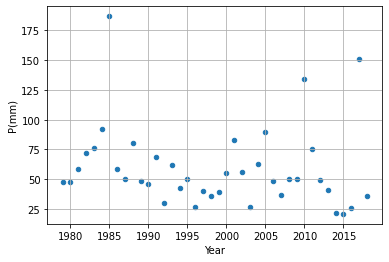

In [ ]:
df.plot(kind='scatter', x='Year', y='P(mm)', grid=True)

## Inferência estatistica

## Método Weibull

In [ ]:
# frequência empirica
def f_emp(n):
  # f = []
  # for i in range(1, n+1):
  #   f.append(i/(n+1))
  return [i/(n + 1) for i in range(1,n+1)] 

# essa função pode ser resumida como [i/(n + 1) for i in range(1,n+1)]

In [ ]:
f_emp(5)

[0.16666666666666666,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.8333333333333334]

In [ ]:
df["P(mm)"].to_list()

[47.3,
 47.3,
 58.3,
 72.0,
 76.0,
 92.0,
 186.8,
 59.0,
 50.0,
 80.8,
 48.6,
 46.4,
 68.8,
 30.4,
 61.9,
 42.7,
 49.8,
 26.6,
 40.5,
 36.1,
 39.0,
 55.4,
 82.6,
 56.4,
 27.1,
 62.9,
 89.7,
 48.9,
 36.6,
 50.0,
 50.0,
 134.2,
 75.2,
 49.4,
 40.7,
 21.3,
 20.9,
 26.2,
 150.6,
 36.3]

In [ ]:
precipitacoes = sorted(df['P(mm)'].to_list()) # precipitações ordenadas do menor para o maior

numero_anos = len(precipitacoes)
f_exced = f_emp(numero_anos)
f_nao_exced = [1 - f for f in f_exced]

In [ ]:
print(precipitacoes)

[20.9, 21.3, 26.2, 26.6, 27.1, 30.4, 36.1, 36.3, 36.6, 39.0, 40.5, 40.7, 42.7, 46.4, 47.3, 47.3, 48.6, 48.9, 49.4, 49.8, 50.0, 50.0, 50.0, 55.4, 56.4, 58.3, 59.0, 61.9, 62.9, 68.8, 72.0, 75.2, 76.0, 80.8, 82.6, 89.7, 92.0, 134.2, 150.6, 186.8]


In [ ]:
df_curvapermanecia = pd.DataFrame({
    'f_exced': f_nao_exced,
    'P_emp(mm)': precipitacoes
})

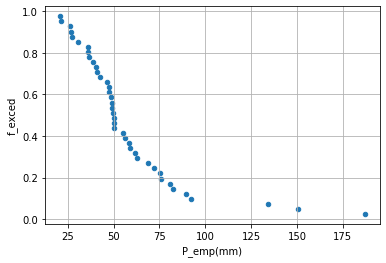

In [ ]:
df_curvapermanecia.plot(kind='scatter', x='P_emp(mm)', y='f_exced', grid=True)

## Ajuste a Gumbel

In [ ]:
import statistics
import math

PI = math.pi
desvio_padrao = statistics.pstdev(precipitacoes) 
media = statistics.mean(precipitacoes)

# parametros da distribuição de gumbel
beta = ( 6 ** 0.5 ) * desvio_padrao / PI
alfa = media - 0.577*beta

In [ ]:
def F_gumbel(y, alfa, beta):
  z = (y - alfa) / beta
  return 1 - math.exp(-math.exp(-z))

def P_gumbel(f, alfa, beta):
  z = -math.log(-math.log(1 - f))
  return alfa + z * beta

print(F_gumbel(50, alfa, beta))
print(P_gumbel(0.55, alfa, beta))

0.5521204950379851
50.15437153117119


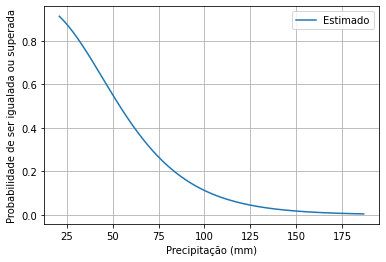

In [ ]:
## Plotando função

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data para plotagem
precipitacoes_numpy = np.arange(precipitacoes[0], precipitacoes[-1], 0.01)
frequencia_gumbel_numpy = np.array([F_gumbel(i, alfa, beta) for i in precipitacoes_numpy])

fig, ax = plt.subplots()
ax.plot(precipitacoes_numpy, frequencia_gumbel_numpy, label='Estimado')

ax.set(xlabel='Precipitação (mm)', ylabel='Probabilidade de ser igualada ou superada',
       title='',)
ax.grid()
ax.legend()

plt.show()

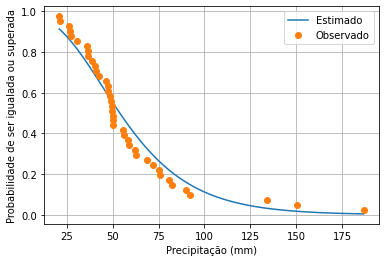

In [ ]:
# comparando frequencias
fig, ax = plt.subplots()
ax.plot(precipitacoes_numpy, frequencia_gumbel_numpy, label='Estimado')
ax.plot(df_curvapermanecia['P_emp(mm)'], df_curvapermanecia['f_exced'], 'o', label='Observado')

ax.set(xlabel='Precipitação (mm)', ylabel='Probabilidade de ser igualada ou superada',
       title='',)
ax.grid()
ax.legend()

plt.show()

In [ ]:
# Avaliar outras duas distribuições ( Weibull, GEV)

In [ ]:
# teste de aderência Kolmogorov-Smirnov, Anderson-Darlling e QuiQuadrado


## Desagregando **chuvas**

In [ ]:
def intensidade_bell(Tr, t, p_2_60):
  return (0.31*math.log(Tr) + 0.7) * (0.38 * t ** 0.31 - 0.39) * p_2_60 / (t/60)


In [ ]:
p_2_60 = 0.51 * P_gumbel(1/2, alfa, beta) # tempo de retorno de 2 anos é a frequencia 1/2

In [ ]:
tr_gerado = np.array([2, 5, 10, 25, 50, 100])#np.linspace(2, 100, 10)
t_gerado = np.linspace(5, 120, 1000)

intensidade = []
for row, tr in enumerate(tr_gerado):
  intensidade.append([])
  for t in t_gerado:
    intensidade[row].append(intensidade_bell(tr, t, p_2_60))

In [ ]:
print(intensidade)

[[71.11884622400937, 70.82464138569239, 70.52369968893788, 70.2171676111779, 69.90605490799292, 69.5912517565281, 69.27354353272561, 68.95362358277492, 68.63210428899171, 68.30952668108128, 67.98636880327444, 67.66305301445689, 67.33995237079452, 67.0173962174256, 66.69567509668218, 66.37504506433058, 66.0557314919309, 65.7379324221538, 65.42182153439782, 65.10755077001872, 64.79525265967514, 64.48504238950666, 64.17701963792844, 63.87127021061428, 63.56786749763265, 63.26687377360578, 62.96834135910074, 62.67231365916682, 62.37882609295523, 62.087906926641644, 61.79957802038821, 61.51385549879185, 61.23075035314284, 60.950268982840086, 60.672413682456224, 60.39718308019819, 60.124572532855886, 59.85457448175808, 59.5871787737497, 59.322372950763565, 59.06014251116649, 58.8004711457176, 58.54334095067045, 58.28873262028253, 58.03662562075662, 57.78699834742691, 57.53982826681586, 57.29509204501957, 57.052765663731925, 56.81282452508514, 56.575243546365854, 56.33999724556123, 56.1070598

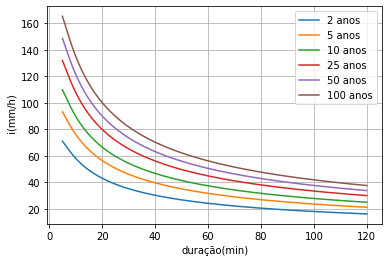

In [ ]:
fig, ax = plt.subplots()
for i, tr in zip(intensidade, tr_gerado):
  ax.plot(t_gerado, i, label=f'{int(tr)} anos')

ax.set(xlabel='duração(min)', ylabel=' i(mm/h)',
       title='',)
ax.grid()
ax.legend()

plt.show()

## Cálculo dos parametros da IDF

In [ ]:
def idf (x, t, Tr):
  a, b, c, d = x 
  return a * (Tr ** b) / (t + c) ** d

In [ ]:
# transformar essa equação
# a * (Tr ** b) / (t + c) ** d => A / (t+c) ** d onde A = a * Tr ** b

In [ ]:
# Determinação de c e d 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit

# Regressão não linear 
f_model = lambda t, A, c, d: A/(t+c) ** d
A_lista = []
c_lista = []
d_lista = []
for i in intensidade:
  x = t_gerado
  y = i
    
  popt, pcov = curve_fit(
      f=f_model,       # model function
      xdata=x,   # x data
      ydata=y,   # y data
      p0=(1000, 10, 1),      # initial value of the parameters
  )
  A, c, d = popt
  c_lista.append(c)
  d_lista.append(d)
  A_lista.append(A)


print(f'o parametro c é de {c_lista}')
print(f'o parametro d é de {d_lista}')
print(f'o parametro A é de {A_lista}')

o parametro c é de [6.986706731582523, 6.986706190585285, 6.986706197778172, 6.986706680493538, 6.986706113351353, 6.986706192724302]
o parametro d é de [0.6358578393623711, 0.635857829031153, 0.6358578291745165, 0.6358578384078671, 0.6358578275237476, 0.6358578290663128]
o parametro A é de [350.61086146736005, 459.46832395938037, 541.8158287377815, 650.6733368535852, 733.0208072176408, 815.3683169744004]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [ ]:
c = statistics.mean(c_lista)
d = statistics.mean(d_lista)

In [ ]:
 # determinando os parametros a e b
f_model = lambda Tr, a, b: a* (Tr ** b)

x = tr_gerado
y = A_lista
    
popt, pcov = curve_fit(
    f=f_model,       # model function
    xdata=x,   # x data
    ydata=y,   # y data
    p0=(1000, 1),      # initial value of the parameters
)
a, b = popt

print(f'o parametro a é de {round(a,2)}')
print(f'o parametro b é de {round(b,2)}')
print(f'o parametro c é de {round(c,2)}')
print(f'o parametro d é de {round(d,2)}')

o parametro a é de 330.65
o parametro b é de 0.2
o parametro c é de 6.99
o parametro d é de 0.64


In [ ]:
# Calcular métricas R² e RMSE

In [ ]:
# plotar gráfico com valores estimados

# Tarefas

- Avaliar outras duas distribuições ( Weibull, GEV)
- teste de aderência Kolmogorov-Smirnov, Anderson-Darlling e QuiQuadrado

- calcular métricas R² e RMSE da IDF
- plotar gráfico com valores estimados da IDF

- calcular outras idfs para outros postos pluviometricos